In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_gml("data/Yeast.gml")

In [3]:
print(G.is_directed(), len(G.nodes), len(G.edges()))

True 4441 12873


In [4]:
# deleting self-loop edges
for n, nbrs in G.adj.items():
    if n in nbrs:
        G.remove_edge(n,n)

In [5]:
print(G.is_directed(), len(G.nodes), len(G.edges()))

True 4441 12873


### 3 nodes chain

In [6]:
node_set = set() # to save the node list
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if(node3 not in [node1, node2] and (node3 not in G.neighbors(node1))): 
                    print(node1, node2, node3)
                    node_set.add(node1); node_set.add(node2); node_set.add(node3);

YDR146C YOR140W YIL162W
YBR182C YOR140W YIL162W
YGR044C YOR140W YIL162W
YGL013C YOR140W YIL162W
YER111C YOR140W YIL162W
YDR043C YOR140W YIL162W
YOR028C YLR228C YMR202W
YGL254W YOR140W YIL162W
YPL248C YOR140W YIL162W
YLR131C YOR140W YIL162W


### Plotting

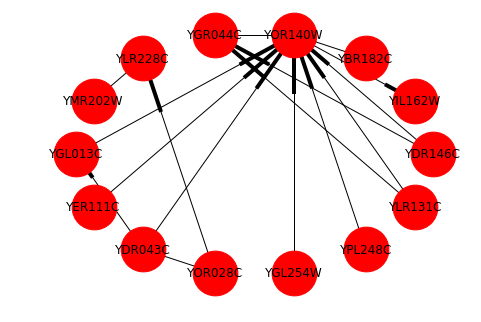

In [7]:
H = G.subgraph(list(node_set))
pos = nx.circular_layout(H)
nx.draw(H, pos, cmap = plt.get_cmap('jet'), node_size = 2000)
nx.draw_networkx_labels(H, pos)
plt.show()

### 3 nodes chain excluding common regulator 

In [8]:
def common_regulator(G, node1, node2):
    in_node1 = [a[0] for a in G.in_edges(node1)]
    in_node2 = [b[0] for b in G.in_edges(node2)]
    for i in in_node1:
        if i in in_node2:
            return True
        return False

In [9]:
common_regulator(G,'marA','putP')

In [10]:
node_set = set() # to save the node list
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if(node3 not in [node1, node2] and (node3 not in G.neighbors(node1)) and not(common_regulator(G, node1, node3))): 
                    print(node1, node2, node3)
                    node_set.add(node1); node_set.add(node2); node_set.add(node3);

YDR146C YOR140W YIL162W
YBR182C YOR140W YIL162W
YGR044C YOR140W YIL162W
YGL013C YOR140W YIL162W
YER111C YOR140W YIL162W
YDR043C YOR140W YIL162W
YOR028C YLR228C YMR202W
YGL254W YOR140W YIL162W
YLR131C YOR140W YIL162W


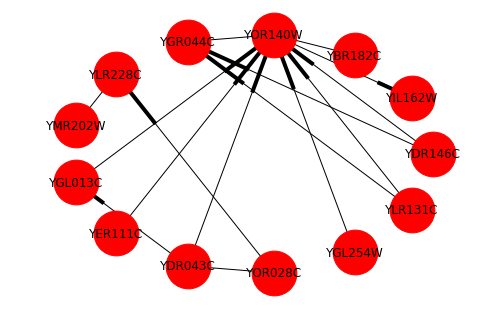

In [11]:
H = G.subgraph(list(node_set))
pos = nx.circular_layout(H)
nx.draw(H, pos, cmap = plt.get_cmap('jet'), node_size = 2000)
nx.draw_networkx_labels(H, pos)
plt.show()

### 4 nodes chain

In [12]:
# pattern 2 search
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if (G.out_degree(node3)>1 or G.out_degree(node3)>1 or node3 in [node1, node2]):
                    continue
                else:
                    for node4 in G.neighbors(node3):
                        if(node4 not in [node1, node2, node3] and (node4 not in G.neighbors(node1))):
                            print(node1, node2, node3, node4)

Comment: No 4 node chain found

### 5 nodes chain

In [14]:
# pattern 2 search
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if (G.out_degree(node3)>1 or G.out_degree(node3)>1 or node3 in [node1, node2]):
                    continue
                else:
                    for node4 in G.neighbors(node3):
                        if (G.out_degree(node4)>1 or G.out_degree(node4)>1 or node4 in [node1, node2, node3]):
                            continue
                        else:
                            for node5 in G.neighbors(node4):
                                if(node4 not in [node1, node2, node3, node4] and (node5 not in G.neighbors(node1))):
                                    print(node1, node2, node3, node4, node5)                            

Comment: No pattern 2 path found